In [116]:
# Based on MAC0417/5768 Visão e Processamento de Imagens
# from Prof. Dr. Paulo A. V. de Miranda

# Plot inline
%matplotlib inline
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

def to_255_image(image):
    Imax = image.max()
    image = np.floor(255*(image/float(Imax)))
    image = image.astype(np.uint8)
    return image

class Spectrum:
    def __init__(self, spectrum):
        self.spectrum = spectrum
    def visualization_mode(self):
        return to_255_image(20*np.log(1+np.abs(self.spectrum)))
    def get_image(self):
        spectrum_shift_back = np.fft.ifftshift(self.spectrum)
        img_back = np.fft.ifft2(spectrum_shift_back)
        return img_back
    # Statics
    @staticmethod
    def to_fourier_spectrum(image):
        f_image = np.fft.fft2(image)
        shift = np.fft.fftshift(f_image)
        return Spectrum(shift)
    

def threshold_image(image, level):
    Imax = image.max()
    limit = level*float(Imax)
    print(limit)
    image = np.where(image >limit, 1, 0)
    return image

def gaussian_filter_image(image, kernel_size):
    #1
    #kernel = np.ones((5,5),np.float32)/25
    #after_gaussian_image = cv2.filter2D(image,-1,kernel)
    #2
    after_gaussian_image = cv2.GaussianBlur(image, kernel_size, 18)
    #after_gaussian_image = cv2.medianBlur(image, 3)
    return after_gaussian_image
    #gaussian_filter(image, 3)
    

    
def median_filter_image(image, kernel_size):
    after_filter_image = cv2.medianBlur(image, 3)
    return after_filter_image

153.0
(480, 640)
153.0
(240, 320)


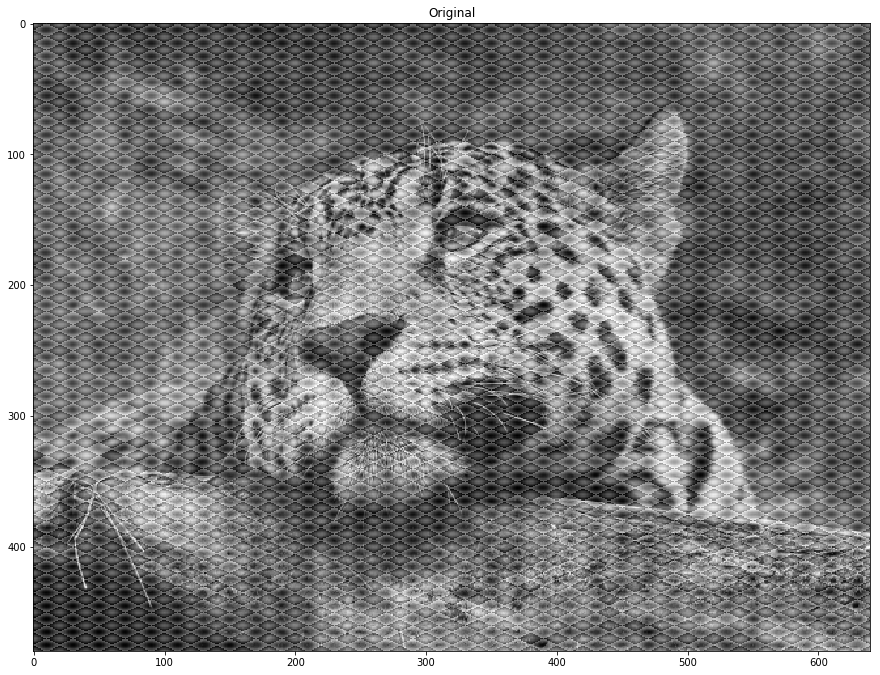

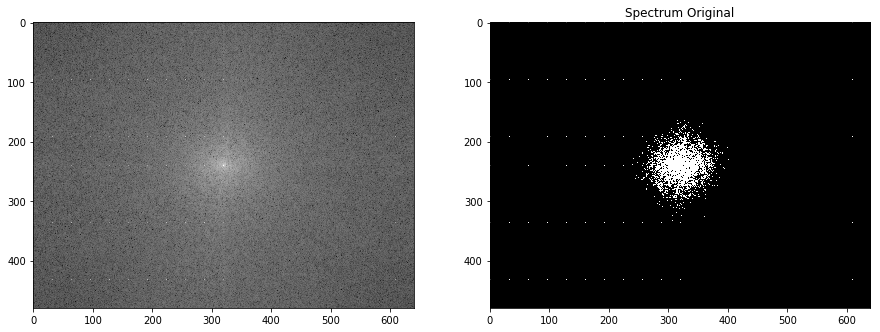

208.320280296


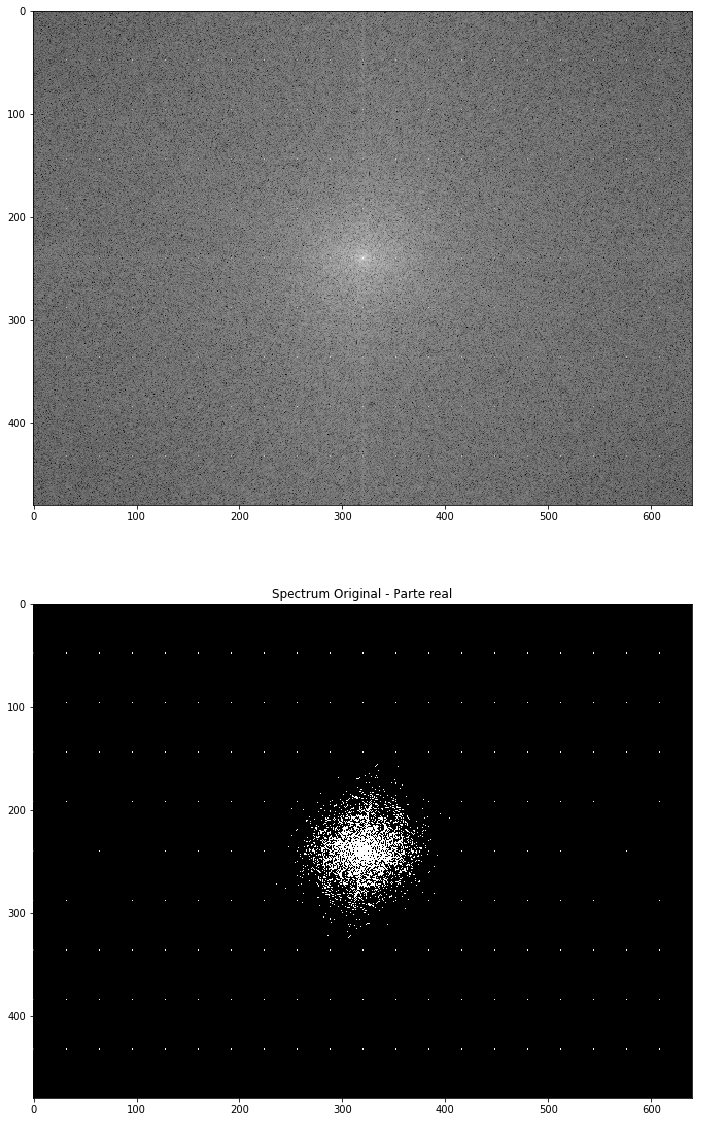

208.320280296


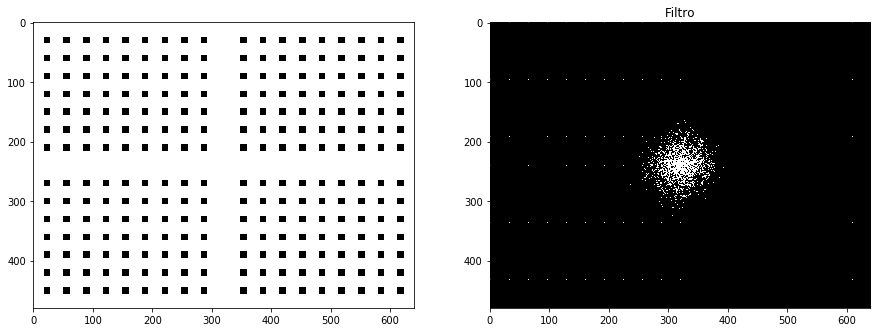

200.547536478


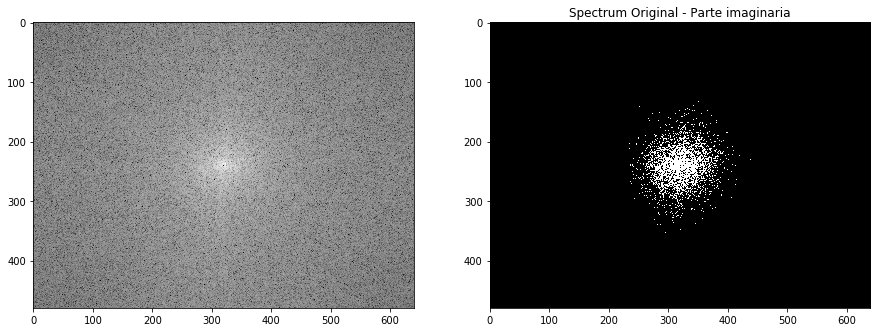

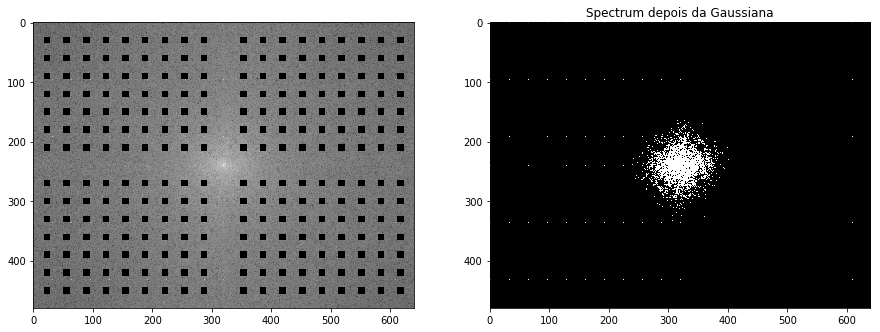

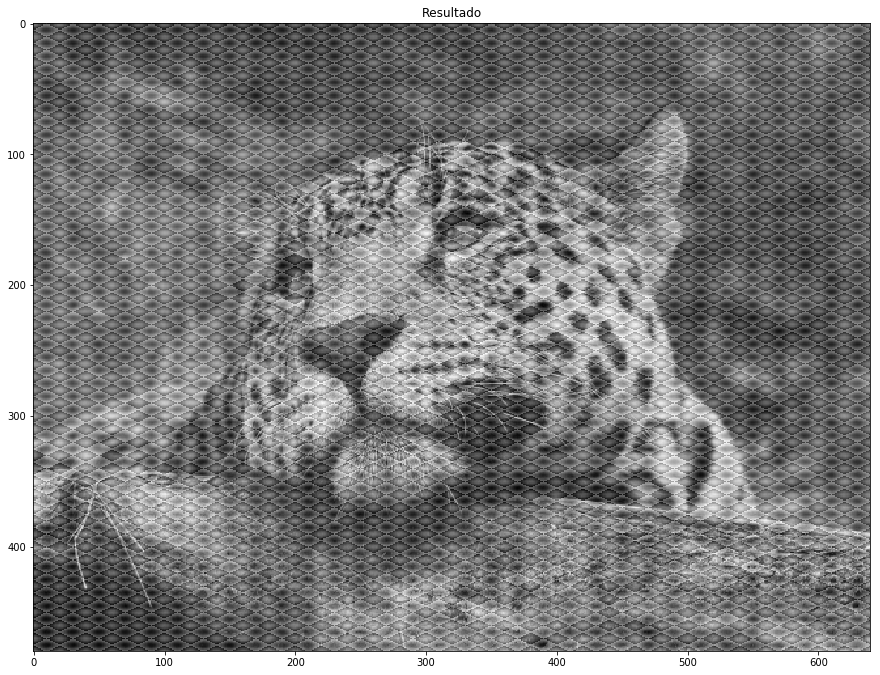

In [136]:
def gauss_kern(size, sizey=None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    x, y = scipy.mgrid[-size:size+1, -sizey:sizey+1]
    g = scipy.exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.max()

def my_filter_image(image):
    shape = image.shape
    filter_inverse = np.zeros(image.shape)
    center_x = shape[0]/2
    center_y = shape[1]/2
    step_y = 33
    step_x = 30
    
    for i in range(center_x + step_x, filter_inverse.shape[0], step_x):
        for j in range(center_y + step_y, filter_inverse.shape[1], step_y):
            filter_inverse[i,j] = 1
        for j in range(center_y - step_y, 0, -step_y):
            filter_inverse[i,j] = 1
            
    for i in range(center_x - step_x , 0, -step_x):
        for j in range(center_y + step_y, filter_inverse.shape[1], step_y):
            filter_inverse[i,j] = 1
        for j in range(center_y - step_y, 0, -step_y):
            filter_inverse[i,j] = 1
    
    filter_inverse = ndimage.morphology.binary_dilation(filter_inverse,  ndimage.generate_binary_structure(2, 15),iterations=5)
    filter_final = np.where(filter_inverse==1,0,1)
    return filter_final
    
    
original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)

spectrum_original = spectrum.visualization_mode()
threshold_spectrum = threshold_image(spectrum_original, 0.60)

base_image = spectrum.spectrum.real.astype(np.float64)
print(base_image.shape)

#real_spectrum = median_filter_image(base_image, 5)
new_filter = my_filter_image(image)
#real_spectrum = gaussian_filter_image(base_image, (25,25))

spectrum_after_gaussian = Spectrum(new_filter * spectrum.spectrum)
after_gaussian_spectrum = spectrum_after_gaussian.visualization_mode()
threshold_after_gaussian_spectrum = threshold_image(after_gaussian_spectrum, 0.60)

image_back = spectrum_after_gaussian.get_image()
image_back = image_back.real.astype(np.float64)

my_filter(base_image)


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()

fig, imgs = plt.subplots(1,2, figsize=(15,10))
imgs[0].imshow(spectrum_original, cmap='gray')
imgs[1].imshow(threshold_spectrum, cmap='gray')
plt.title('Spectrum Original')
plt.show()

fig, imgs = plt.subplots(2,1, figsize=(15,20))
sp_real = 20*np.log(1+np.abs(spectrum.spectrum.real))
imgs[0].imshow(sp_real, cmap='gray')
imgs[1].imshow(threshold_image(sp_real, 0.60), cmap='gray')
plt.title('Spectrum Original - Parte real')
plt.show()

fig, imgs = plt.subplots(1,2, figsize=(15,20))
sp_real = 20*np.log(1+np.abs(spectrum.spectrum.real))
imgs[0].imshow(my_filter_image(image), cmap='gray')
imgs[1].imshow(threshold_image(sp_real, 0.60), cmap='gray')
plt.title('Filtro')
plt.show()

fig, imgs = plt.subplots(1,2, figsize=(15,10))
sp_imag = 20*np.log(1+np.abs(spectrum.spectrum.imag))
imgs[0].imshow(sp_imag, cmap='gray')
imgs[1].imshow(threshold_image(sp_imag, 0.7), cmap='gray')
plt.title('Spectrum Original - Parte imaginaria')
plt.show()

fig, imgs = plt.subplots(1,2, figsize=(15,10))
imgs[0].imshow(after_gaussian_spectrum, cmap='gray')
imgs[1].imshow(threshold_after_gaussian_spectrum, cmap='gray')
plt.title('Spectrum depois da Gaussiana')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(image_back, cmap='gray')
plt.title('Resultado')
plt.show()

(133407.99999999965-2.3931079340400174e-11j)
133407.99999999965
-2.3931079340400174e-11
(133407.99999999965-2.3931079340400174e-11j)


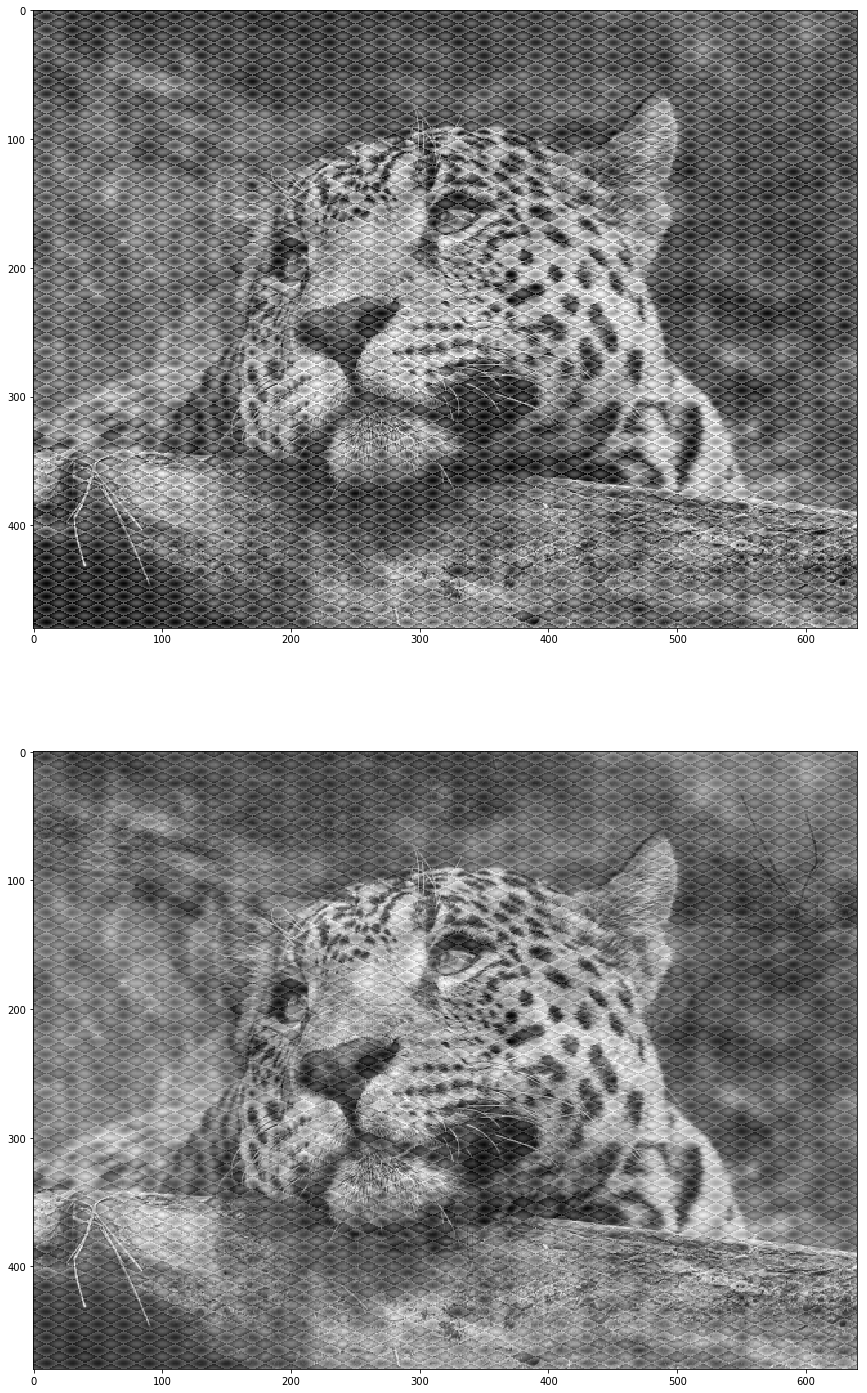

In [133]:
original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)

print (spectrum.spectrum[0,0])
print (spectrum.spectrum[0,0].real)
print (spectrum.spectrum[0,0].imag)
print (spectrum.spectrum[0,0].real + spectrum.spectrum[0,0].imag*1j)

spectrum_real = Spectrum(spectrum.spectrum.real*0.5 + spectrum.spectrum.imag*1j)

image_back = spectrum_real.get_image()
image_back = image_back.real.astype(np.float64)


fig, imgs = plt.subplots(2,1, figsize=(15,25))
imgs[0].imshow(original_img, cmap='gray')
imgs[1].imshow(image_back, cmap='gray')
plt.show()